<a href="https://colab.research.google.com/github/manlio99/Materia-de-aprendizaje/blob/master/8_feature_selection/Empresa2/MercadoLibre_Serie_Tiempo_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mercado Libre
Como es un desarrollo basico que se va a compartir prefiero iniciarlo en colab, para eso primero importamos las librerias de google y despues obtenemos los dataframes, aplicamos encoders y estandarizamos el tiempo.

In [ ]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())


In [ ]:
VENTAS_ = gc.open("VENTAS").get_worksheet(0)
ventas = pd.DataFrame.from_dict(VENTAS_.get_all_records())
# reemplazamos los NA por 0 para los productos que no tienen VAR_ID
ventas.ITE_VAR_ID.fillna(0, inplace=True)
ventas["ITE_VAR_ID"] = ventas["ITE_VAR_ID"].str.replace('NA','0').str.replace(',','').astype('int')
# ventas.isnull().any() # Looking for missing values
# ventas.columns # column names
ventas['Formatted_Date'] = pd.to_datetime(ventas['DATE'])
# ventas.head(-10) # first 10 records
ventas.describe() # summary


,ITE_ITEM_ID,ITE_VAR_ID,NEGOCIO_ID,VENTAS
count,3.464000e+03,3.464000e+03,3464.0,3464.000000
mean,1.681636e+09,9.429603e+10,960899288.0,26.577656
std,2.713688e+07,2.852797e+10,0.0,66.224365
min,1.642699e+09,0.000000e+00,960899288.0,1.000000
25%,1.654755e+09,9.401027e+10,960899288.0,2.000000
50%,1.677573e+09,9.850102e+10,960899288.0,8.000000
75%,1.703919e+09,1.081371e+11,960899288.0,26.000000
max,1.741543e+09,1.218893e+11,960899288.0,1403.000000


In [ ]:
stock_ = gc.open("STOCK").get_worksheet(0)
stock = pd.DataFrame.from_dict(stock_.get_all_records())

stock.STOCK.fillna(0, inplace=True)
stock["ITE_VAR_ID"][stock["ITE_VAR_ID"]==""] = 0
stock['Formatted_Date'] = pd.to_datetime(stock['DATE'])
stock["STOCK"] = [float(str(i).replace("NA", "NaN")) for i in stock["STOCK"]]
# stock.ITE_VAR_ID.fillna(0, inplace=True)
stock.head(-10) # first 10 records
# stock.isnull().any() # Looking for missing values
# stock.columns # column names
# stock.describe() # summary

,DATE,SITIO,NEGOCIO_ID,ITE_ITEM_ID,ITE_VAR_ID,STOCK,Formatted_Date
0,5/7/2020,MLA,960899288,1723342196,115650105316,1857.0,2020-05-07
1,5/7/2020,MLA,960899288,1708370636,0,0.0,2020-05-07
2,21/7/2020,MLA,960899288,1698330614,107860378264,0.0,2020-07-21
3,5/3/2020,MLA,960899288,1665695740,97319558766,0.0,2020-05-03
4,6/6/2020,MLA,960899288,1665695740,97319558766,0.0,2020-06-06
...,...,...,...,...,...,...,...
14395,17/7/2020,MLA,960899288,1688656308,105053842740,0.0,2020-07-17
14396,23/7/2020,MLA,960899288,1699476578,108137059238,0.0,2020-07-23
14397,8/2/2020,MLA,960899288,1642819618,90783919354,0.0,2020-08-02
14398,2/7/2020,MLA,960899288,1698330614,107860378264,0.0,2020-02-07


In [ ]:
VISITAS_ = gc.open("VISITAS").get_worksheet(0)
visitas = pd.DataFrame.from_dict(VISITAS_.get_all_records())
visitas['DEVICE'] = visitas['DEVICE'].astype('category')# encoding
visitas['DEVICE_cat'] = visitas['DEVICE'].cat.codes
visitas['Formatted_Date'] = pd.to_datetime(visitas['DATE'])
# print(visitas)
# visitas.columns # column names
visitas.head(10) # first 10 records
# visitas.describe() # summary

,NEGOCIO_ID,ITE_ITEM_ID,QTY_VISITS,DEVICE_cat
count,29308.0,2.930800e+04,29308.000000,29308.000000
mean,960899288.0,1.684446e+09,181.952402,1.427255
std,0.0,2.499746e+07,1063.313382,1.039368
min,960899288.0,1.640347e+09,0.000000,0.000000
25%,960899288.0,1.661028e+09,2.000000,1.000000
50%,960899288.0,1.693043e+09,8.000000,1.000000
75%,960899288.0,1.700859e+09,62.000000,2.000000
max,960899288.0,1.741543e+09,97102.000000,3.000000


In [ ]:
PUBLICACIONES_ = gc.open("PUBLICACIONES").get_worksheet(0)
publi = pd.DataFrame.from_dict(PUBLICACIONES_.get_all_records())
publi['ITE_ATT_BRAND'] = publi['ITE_ATT_BRAND'].astype('category')# encoding
publi['ITE_ATT_BRAND_Cat'] = publi['ITE_ATT_BRAND'].cat.codes

# print(publi)
# publi.columns # column names
# publi.head(10) # first 10 records
# publi.describe() # summary
publi

,SITIO,ITE_ITEM_ID,ITE_ITEM_TITLE,NEGOCIO_ID,ITE_STATUS,ITE_DOM_DOMAIN_ID,ITE_ATT_BRAND,ITE_ATT_BRAND_Cat
0,MLA,1728401696,Acondicionador Swing Liso Perfecto X 200 Ml,1074090314,paused,,Botella,40
1,MLA,1721904356,Loción Fresh Hidratante x 400 Ml,1074090314,paused,,FARMACITY,114
2,MLA,1719911868,Crema Dental Colgate Total Salud Visible 100ml,1074090314,active,MLA-TOOTHPASTES,Colgate,81
3,MLA,1701286858,Samsung Libre Galaxy S10 No 128 Gb 8 Gb,960899288,closed,,Samsung,316
4,MLA,1707820872,Samsung Libre Galaxy S10 No 128 Gb 8 Gb,960899288,closed,,Samsung,316
...,...,...,...,...,...,...,...,...
2769,MLA,1741660796,Pañuelos Descartables Elite Compacto X8 C/ext....,1074090314,paused,MLA-FACIAL_TISSUES,Elite,109
2770,MLA,1721903042,Protectores Mamarios Anatómicos Farmacity Bebé...,1074090314,paused,,FARMACITY BEBE,115
2771,MLA,1704503784,Nosotras Invisible Clasica C/alas Bol.x 16 Utoa,1074090314,active,MLA-PADS,NOSOTRAS INVISIBLE CLASICA,208
2772,MLA,1704505398,Colgate Herbal Blanqueadora C/calc.y Fluor 90 ...,1074090314,closed,,Colgate,81


# Un poco de Analisis de series de tiempo

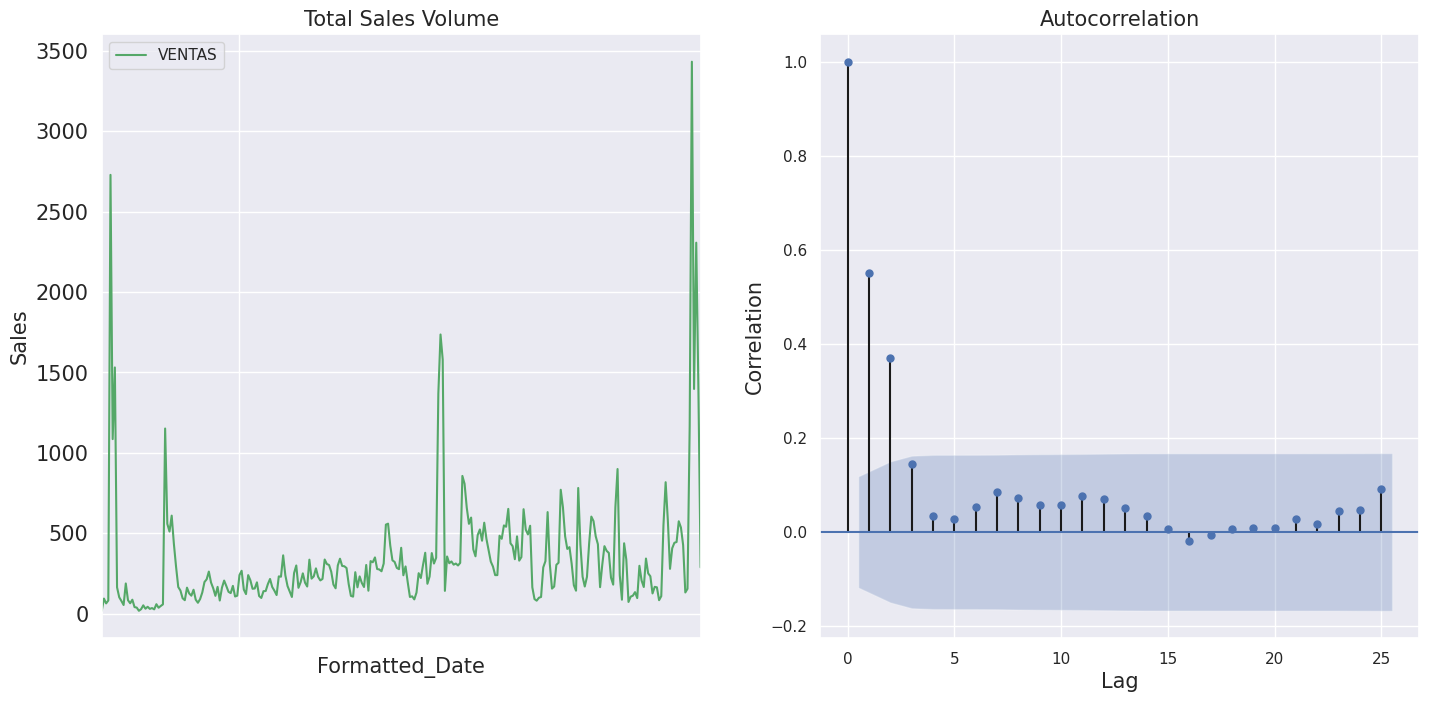

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.dates as mdates
import datetime
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

green = sns.color_palette("deep",8)[2]
blue = sns.color_palette("deep",8)[0]

df_sales  = ventas.copy()
fig = plt.figure(figsize=(17,8))
ax1 = fig.add_subplot(121)
df_sales_sum = df_sales.groupby(by=['Formatted_Date'], as_index=False)['VENTAS'].sum()
# df_sales_sum["Formatted_Date"] = pd.to_datetime(df_sales_sum["Formatted_Date"])
df_sales_sum.plot(x="Formatted_Date",y="VENTAS",color="g",ax=ax1, fontsize=15)
plt.xlabel("Formatted_Date",fontsize=15)
plt.title("Total Sales Volume", fontsize=15)
plt.ylabel("Sales", fontsize=15)
date_form = mdates.DateFormatter("%Y-%m-%d")
year_locator = mdates.YearLocator()
ax1.xaxis.set_major_locator(year_locator)
ax2 = fig.add_subplot(122)
plot_acf(df_sales_sum.VENTAS,ax=ax2)
plt.title("Autocorrelation", fontsize=15)
plt.xlabel("Lag",fontsize=15)
plt.ylabel("Correlation", fontsize=15)
plt.show()

In [ ]:
df_total_ventas, df_total_stock, df_total_visitas = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
df_total_ventas = ventas.groupby(by=['Formatted_Date'], as_index=False)['VENTAS'].sum()
df_total_stock = stock.groupby(by=['Formatted_Date'], as_index=False)['STOCK'].sum()
df_total_visitas = visitas.groupby(by=['Formatted_Date'], as_index=False)['QTY_VISITS'].sum()
df_todo = df_total_ventas.copy()
df_todo  = df_todo.sort_values(by=['Formatted_Date']) 
df_todo.reset_index(drop=True), df_total_ventas.reset_index(drop=True), df_total_stock.reset_index(drop=True), df_total_visitas.reset_index(drop=True)

df_todo = pd.merge(df_todo, df_total_stock, on='Formatted_Date', how='left')
df_todo = pd.merge(df_todo, df_total_visitas, on='Formatted_Date', how='left')
df_todo
# df_todo['STOCK'] = df_todo['Formatted_Date'].mask(df_todo['Formatted_Date'] == df_total_stock['Formatted_Date'],
#                                    df_total_stock['STOCK'])

# df_todo['STOCK'] = np.where(df_todo['Formatted_Date'] == df_total_stock['Formatted_Date'],  df_total_stock['STOCK'],np.nan)

,Formatted_Date,VENTAS,STOCK,QTY_VISITS
0,2019-10-31,17,4200.0,2450.0
1,2019-11-01,93,NaN,NaN
2,2019-11-02,63,NaN,NaN
3,2019-11-03,81,NaN,NaN
4,2019-11-04,2729,NaN,NaN
...,...,...,...,...
270,2020-07-27,3433,4589.0,216217.0
271,2020-07-28,1397,3786.0,91463.0
272,2020-07-29,2307,4043.0,57724.0
273,2020-07-30,1385,3849.0,45072.0


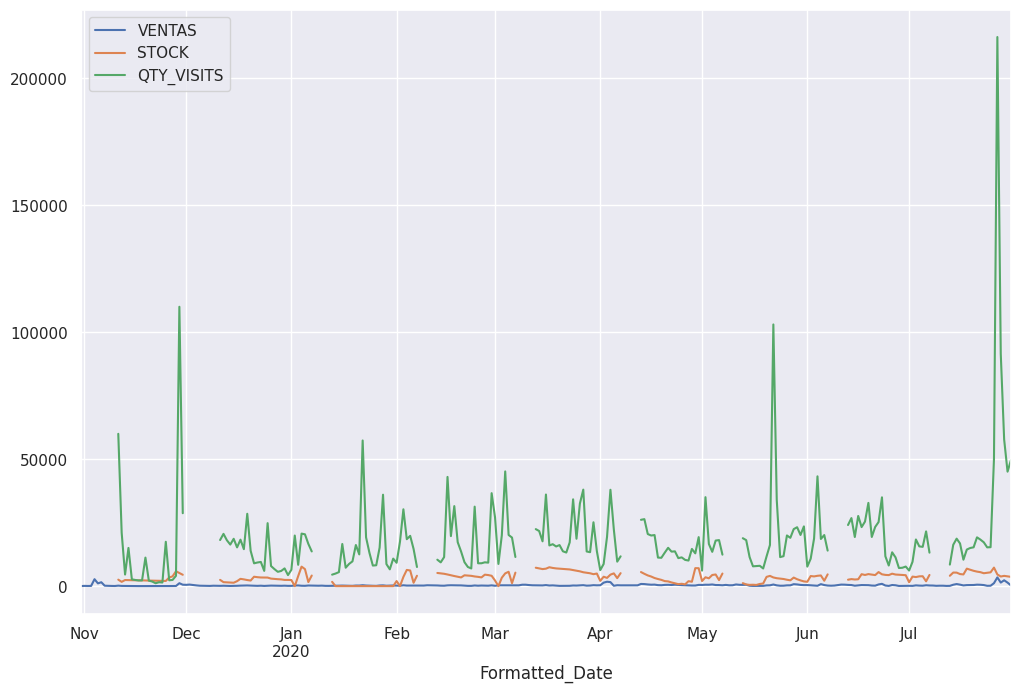

In [ ]:

df_todo.set_index('Formatted_Date', inplace=True)
df_todo.plot(label='Formatted_Date')

In [ ]:
import fbprophet

In [ ]:
# Prophet requires columns ds (Date) and y (value)
#cut 12 weeks to generate train and test data
N=12*7
df_todo_train = df_todo.iloc[:-N , :]
df_todo_train = df_todo_train.reset_index()
df_todo_train["ds"] = df_todo_train['Formatted_Date']
df_todo_train["y"] = df_todo_train['VENTAS']*1.0
df_todo_train

,Formatted_Date,VENTAS,STOCK,QTY_VISITS,ds,y
0,2019-10-31,17,4200.0,2450.0,2019-10-31,17.0
1,2019-11-01,93,NaN,NaN,2019-11-01,93.0
2,2019-11-02,63,NaN,NaN,2019-11-02,63.0
3,2019-11-03,81,NaN,NaN,2019-11-03,81.0
4,2019-11-04,2729,NaN,NaN,2019-11-04,2729.0
...,...,...,...,...,...,...
186,2020-05-04,651,4388.0,13502.0,2020-05-04,651.0
187,2020-05-05,437,4587.0,17940.0,2020-05-05,437.0
188,2020-05-06,419,2374.0,18124.0,2020-05-06,419.0
189,2020-05-07,338,4958.0,12396.0,2020-05-07,338.0


In [ ]:
N=12*7
df_todo_test = df_todo.iloc[-N: , :]
df_todo_test = df_todo_test.reset_index()
df_todo_test

,Formatted_Date,VENTAS,STOCK,QTY_VISITS
0,2020-05-09,329,NaN,NaN
1,2020-05-10,351,NaN,NaN
2,2020-05-11,649,NaN,NaN
3,2020-05-12,522,NaN,NaN
4,2020-05-13,492,1176.0,18873.0
...,...,...,...,...
79,2020-07-27,3433,4589.0,216217.0
80,2020-07-28,1397,3786.0,91463.0
81,2020-07-29,2307,4043.0,57724.0
82,2020-07-30,1385,3849.0,45072.0


# ADF Test
Serie Estacional 

In [ ]:
import numpy as np
import pandas as pd, datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
# import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from time import time
import os
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
import xgboost as xgb
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

result = adfuller(df_todo_train.loc[:, 'y'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}'+"p_value menor que 0.05-> Serie Estacional")
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -7.773215108070996
n_lags: 8.807722972083404e-12
p-value: 8.807722972083404e-12p_value menor que 0.05-> Serie Estacional
Critial Values:
   1%, -3.4652439354133255
Critial Values:
   5%, -2.8768752281673717
Critial Values:
   10%, -2.574944653739612


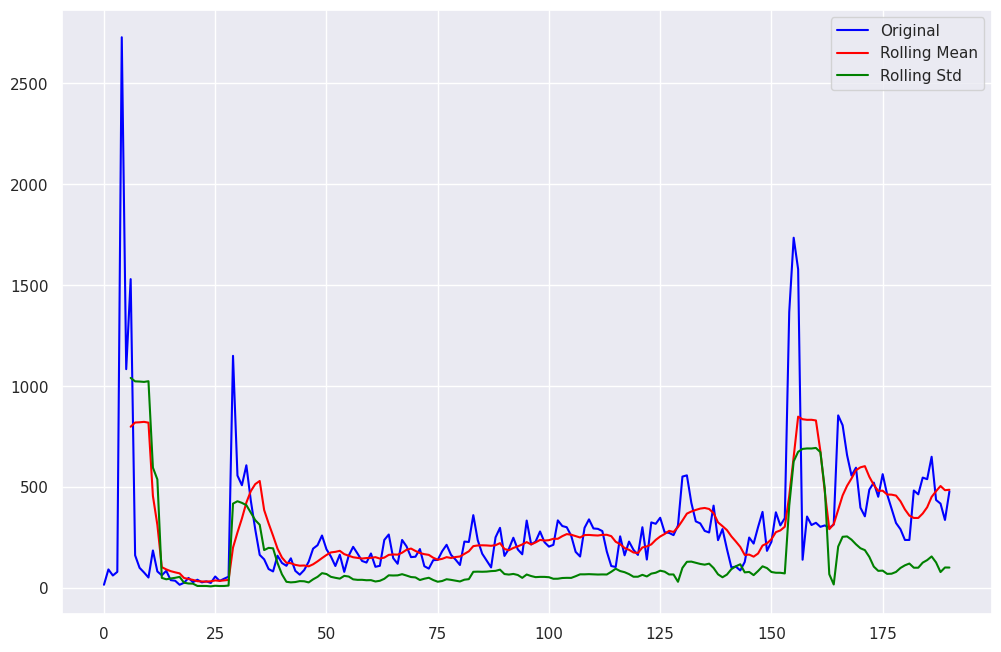

In [ ]:
# Function to test the stationarity
def test_stationarity(timeseries):
    series = timeseries.rolling(window=7).mean()
    roll_mean = timeseries.rolling(window=7).mean()
    roll_std = timeseries.rolling(window=7).std()# Plotting rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)

timeseries=df_todo_train.loc[:, 'y']
test_stationarity(timeseries)

# ARIMA MODEL

In [ ]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA: ')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA: 
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
# Determing p,d,q combinations with AIC scores.
res_sarima=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        # try:
            mod = sm.tsa.statespace.SARIMAX(timeseries,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            res_sarima.append([param, param_seasonal, results.aic])
        # except:
        #     continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2844.613218794368
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2564.410417570248
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2632.705548870269
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2332.643212825194
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2567.493813669451
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2556.0668717290864
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2353.745275221566
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2329.8717162216253
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2756.453551249274
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2450.858044182809
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2580.1421769827593
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2286.5673590808456
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2480.7722846269116
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2449.8792883990973
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2319.5933802936916
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2248.99012382529
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2705.9071340274395
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2358.677100355857
ARI

In [ ]:
res_arima=pd.DataFrame(res_sarima,columns=["ARIMA1","ARIMA2","AIC"])

print(str(res_arima["AIC"].idxmin())+" best SARIMA values")
res_arima.loc[res_arima["AIC"].idxmin()]
# Fitting the data to ARIMA model 
model_sarima = sm.tsa.statespace.SARIMAX(timeseries,
                                order=res_arima.loc[res_arima["AIC"].idxmin()][0],
                                seasonal_order=res_arima.loc[res_arima["AIC"].idxmin()][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_sarima = model_sarima.fit()
print(results_sarima.summary().tables[1])

63 best SARIMA values
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6064      0.024     25.618      0.000       0.560       0.653
ma.L1         -1.0000      4.695     -0.213      0.831     -10.203       8.203
ar.S.L12       0.3249      0.051      6.328      0.000       0.224       0.426
ma.S.L12      -0.9975      4.767     -0.209      0.834     -10.341       8.346
sigma2      3.452e+04      0.000   2.54e+08      0.000    3.45e+04    3.45e+04


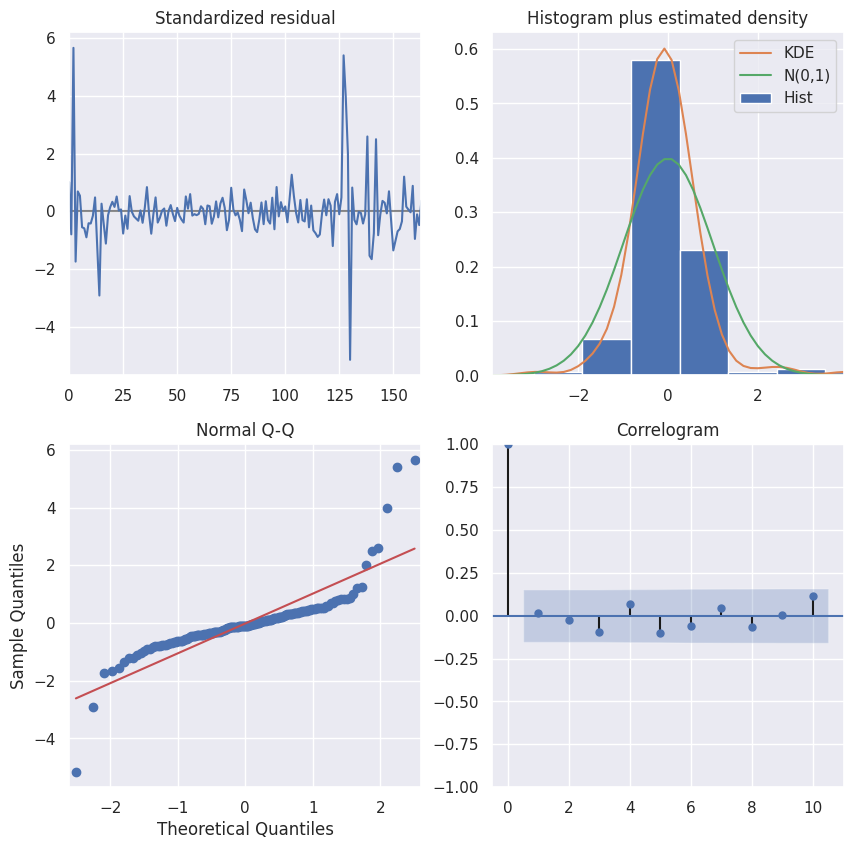

In [ ]:
# Checking diagnostic plots
results_sarima.plot_diagnostics(figsize=(10, 10))
plt.show()
results_sarima

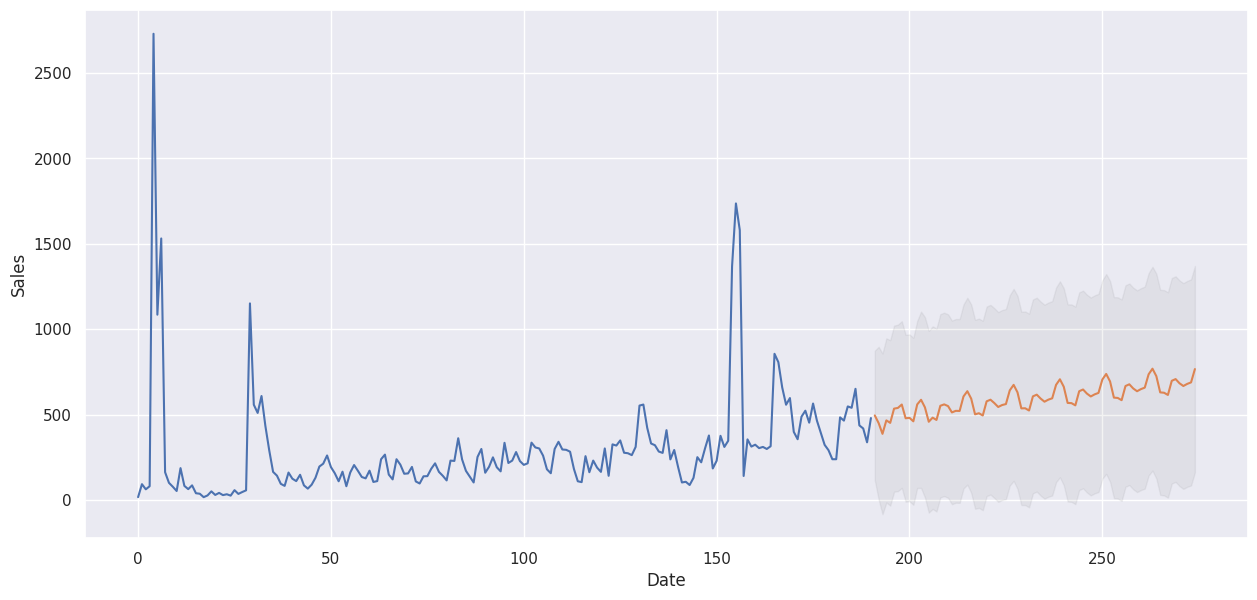

Root Mean Squared Error:  490.0260961476545


In [ ]:
# Model Prediction
# Predictions are performed for the 
# data_to_predict = pd.Series(imput_data, index='Formatted_Date')
df_todo_test["y"]= df_todo_test.loc[:, 'VENTAS']*1.0

pred = results_sarima.get_prediction(start=191, end= 191+83, dynamic = False)
# Get confidence intervals of forecasts
pred_ci = pred.conf_int()

ax = timeseries[:].plot(label = "observed", figsize=(15, 7))
pred.predicted_mean.plot(ax = ax, label = "One-step ahead Forecast", alpha = 1)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], 
                color = "k", alpha = 0.05)
ax.set_xlabel("Date")
ax.set_ylabel("Sales")
plt.legend
plt.show()
train_arima_forecasted = pred.predicted_mean
train_arima_truth = df_todo_test['y'] # Calculating the error
rms_arima = sqrt(mean_squared_error(train_arima_truth, train_arima_forecasted))
print("Root Mean Squared Error: ", rms_arima)

# Predicción simple usando fbprophet
Los puntos negros representan los valores reales (nótese que se detienen), la línea azul indica los valores previstos para las próximas 12 semanas.

In [ ]:

gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
gm_prophet.fit(df_todo_train)
# Make a future dataframe for 12 WEEKS
gm_forecast = gm_prophet.make_future_dataframe(periods=12*7, freq='D')# Make predictions
gm_forecast = gm_prophet.predict(gm_forecast)
gm_forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-10-31,292.459524,-83.422131,647.336260,292.459524,292.459524,-11.104770,-11.104770,-11.104770,-11.104770,-11.104770,-11.104770,0.0,0.0,0.0,281.354755
1,2019-11-01,290.458454,-51.557915,670.568569,290.458454,290.458454,23.998499,23.998499,23.998499,23.998499,23.998499,23.998499,0.0,0.0,0.0,314.456953
2,2019-11-02,288.457383,-113.212194,638.873710,288.457383,288.457383,-37.007064,-37.007064,-37.007064,-37.007064,-37.007064,-37.007064,0.0,0.0,0.0,251.450320
3,2019-11-03,286.456313,-205.498996,544.168557,286.456313,286.456313,-102.676866,-102.676866,-102.676866,-102.676866,-102.676866,-102.676866,0.0,0.0,0.0,183.779447
4,2019-11-04,284.455243,29.129328,765.556101,284.455243,284.455243,109.490120,109.490120,109.490120,109.490120,109.490120,109.490120,0.0,0.0,0.0,393.945363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2020-07-27,740.924119,464.839465,1217.336590,687.850842,790.490671,109.490120,109.490120,109.490120,109.490120,109.490120,109.490120,0.0,0.0,0.0,850.414239
271,2020-07-28,743.877012,415.960492,1143.008448,690.146611,794.518511,6.463673,6.463673,6.463673,6.463673,6.463673,6.463673,0.0,0.0,0.0,750.340685
272,2020-07-29,746.829906,387.329177,1116.457358,692.549775,798.349656,10.836406,10.836406,10.836406,10.836406,10.836406,10.836406,0.0,0.0,0.0,757.666312
273,2020-07-30,749.782799,357.128303,1102.877395,695.079522,802.427397,-11.104770,-11.104770,-11.104770,-11.104770,-11.104770,-11.104770,0.0,0.0,0.0,738.678030


Text(0.5, 1.0, 'ventas en las proximas 12 semanas')

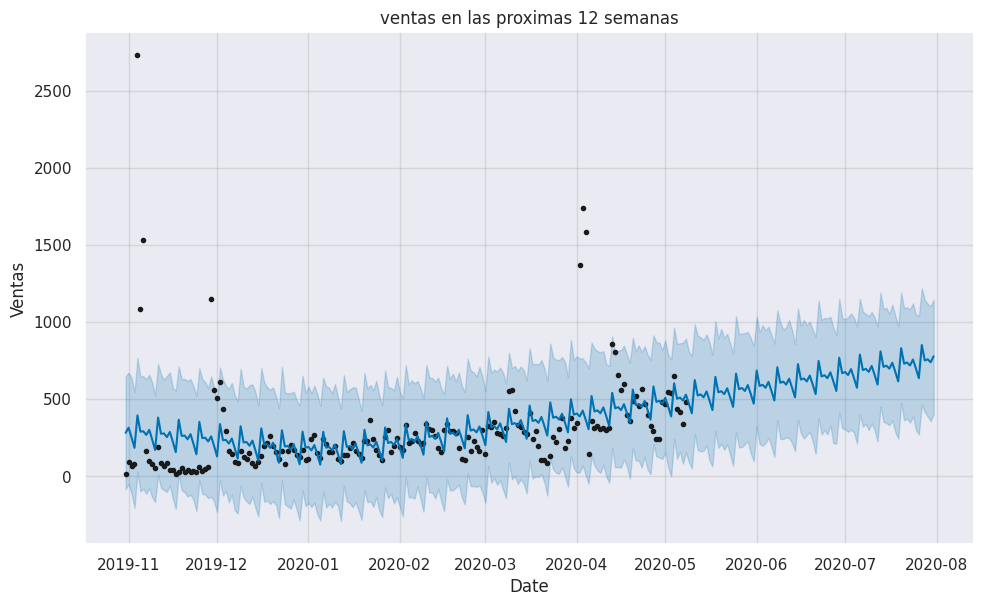

In [ ]:
gm_prophet.plot(gm_forecast, xlabel = 'Date', ylabel = 'Ventas')
plt.title("ventas en las proximas 12 semanas")

In [ ]:
gm_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(df_todo_test[:N]["VENTAS"], gm_forecast[:N]["yhat"]))

print('RMSE: %.3f' % rmse)

RMSE: 526.536


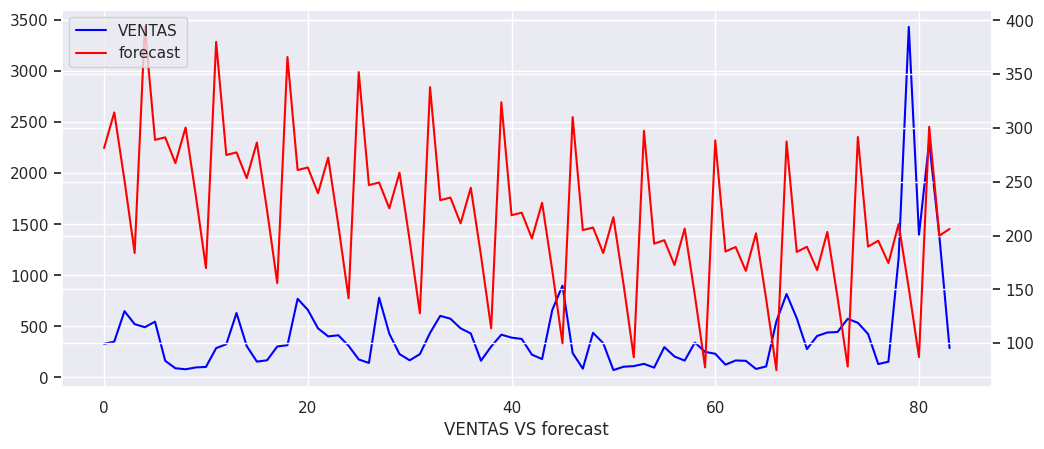

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('VENTAS VS forecast')

ax1 = df_todo_test[:N]["VENTAS"].plot(color='blue', grid=True, label='VENTAS')
ax2 = gm_forecast[:N]["yhat"].plot(color='red', grid=True, secondary_y=True, label='forecast')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

**Ahora vemos la relacion con los días de la semana y la estacionalidad.**

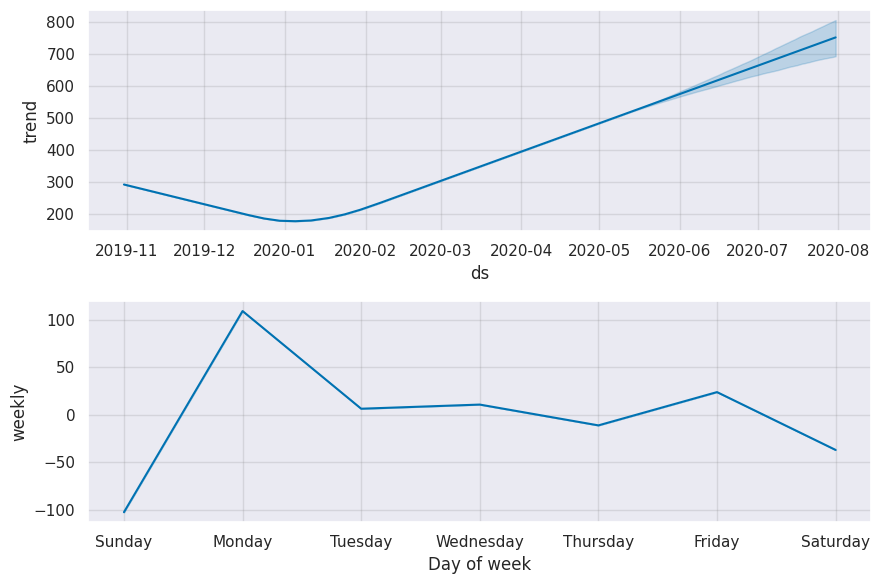

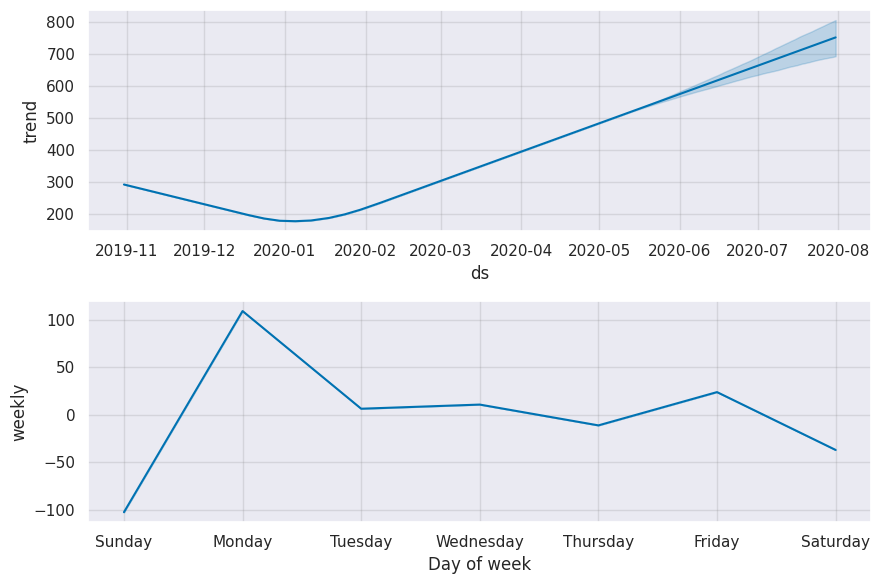

In [ ]:
gm_prophet.plot_components(gm_forecast)

Ahora comparamos los puntos de cambio con la cantidad de ventas

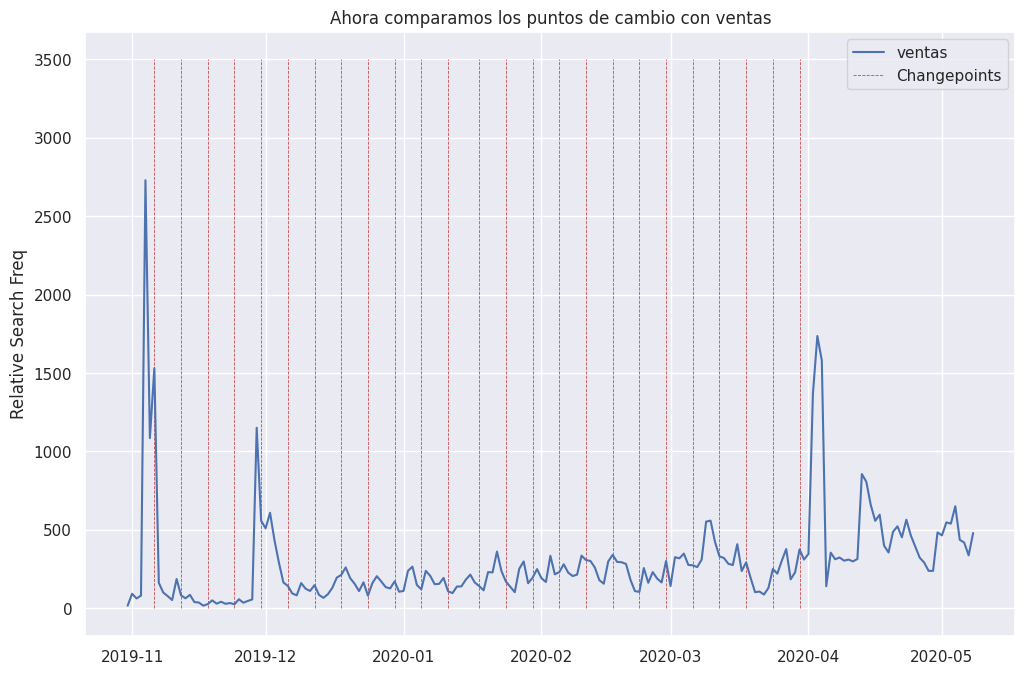

In [ ]:
changepoints = [str(date) for date in gm_prophet.changepoints]
changepoints= pd.to_datetime(changepoints)

plt.plot(df_todo_train['ds'], df_todo_train['y'], label = 'ventas')# Plot the changepoints
plt.vlines(changepoints, ymin = 0, ymax= 3500, colors = 'r', linewidth=0.6, linestyles = 'dashed', label = 'Changepoints')# Formatting of plot
plt.grid('off'); plt.ylabel('Relative Search Freq'); plt.legend()
plt.title('Ahora comparamos los puntos de cambio con ventas');



# ARIMA realizó la mejor predicción.

# Referencias:

https://github.com/adbrebs/taxi
https://www.lotuslabs.ai/forecasting-retail-store-sales-with-deep-learning-using-entity-embeddings/

https://docs.aws.amazon.com/forecast/latest/dg/aws-forecast-recipe-deeparplus.html

https://towardsdatascience.com/sales-forecasting-from-time-series-to-deep-learning-5d115514bfac

https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

https://www.it-swarm-es.com/es/python/auto.arima-equivalente-para-python/1046491068/

https://medium.com/analytics-vidhya/predicting-sales-time-series-analysis-forecasting-with-python-b81d3e8ff03f
